In [1]:
R.version

               _                                
platform       x86_64-w64-mingw32               
arch           x86_64                           
os             mingw32                          
crt            ucrt                             
system         x86_64, mingw32                  
status                                          
major          4                                
minor          4.1                              
year           2024                             
month          06                               
day            14                               
svn rev        86737                            
language       R                                
version.string R version 4.4.1 (2024-06-14 ucrt)
nickname       Race for Your Life               

# Data preprocessing

In [2]:
rm(list=ls())
bodyfat <- read.csv("BodyFat.csv")
head(bodyfat)
tail(bodyfat)

IDNO BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP  
1 1    12.6    1.0708  23  154.25 67.75  23.7      36.2  93.1  85.2    94.5
2 2     6.9    1.0853  22  173.25 72.25  23.4      38.5  93.6  83.0    98.7
3 3    24.6    1.0414  22  154.00 66.25  24.7      34.0  95.8  87.9    99.2
4 4    10.9    1.0751  26  184.75 72.25  24.9      37.4 101.8  86.4   101.2
5 5    27.8    1.0340  24  184.25 71.25  25.6      34.4  97.3 100.0   101.9
6 6    20.6    1.0502  24  210.25 74.75  26.5      39.0 104.5  94.4   107.8
  THIGH KNEE ANKLE BICEPS FOREARM WRIST
1 59.0  37.3 21.9  32.0   27.4    17.1 
2 58.7  37.3 23.4  30.5   28.9    18.2 
3 59.6  38.9 24.0  28.8   25.2    16.6 
4 60.1  37.3 22.8  32.4   29.4    18.2 
5 63.2  42.2 24.0  32.2   27.7    17.7 
6 66.0  42.0 25.6  35.7   30.6    18.8

IDNO BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP  
247 247  29.1    1.0308  69  215.50 70.50  30.5      40.8 113.7 107.6   110.0
248 248  11.5    1.0736  70  134.25 67.00  21.1      34.9  89.2  83.6    88.8
249 249  32.3    1.0236  72  201.00 69.75  29.1      40.9 108.5 105.0   104.5
250 250  28.3    1.0328  72  186.75 66.00  30.2      38.9 111.1 111.5   101.7
251 251  25.3    1.0399  72  190.75 70.50  27.0      38.9 108.3 101.3    97.8
252 252  30.7    1.0271  74  207.50 70.00  29.8      40.8 112.4 108.5   107.1
    THIGH KNEE ANKLE BICEPS FOREARM WRIST
247 63.3  44.0 22.6  37.5   32.6    18.8 
248 49.6  34.8 21.5  25.6   25.7    18.5 
249 59.6  40.8 23.2  35.2   28.6    20.1 
250 60.3  37.3 21.5  31.3   27.2    18.0 
251 56.0  41.6 22.7  30.5   29.4    19.8 
252 59.3  42.2 24.6  33.7   30.0    20.9

In [3]:
# delete column ID
bodyfat <- bodyfat[ , !(names(bodyfat) %in% c("IDNO"))]
head(bodyfat)

BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP   THIGH
1 12.6    1.0708  23  154.25 67.75  23.7      36.2  93.1  85.2    94.5 59.0 
2  6.9    1.0853  22  173.25 72.25  23.4      38.5  93.6  83.0    98.7 58.7 
3 24.6    1.0414  22  154.00 66.25  24.7      34.0  95.8  87.9    99.2 59.6 
4 10.9    1.0751  26  184.75 72.25  24.9      37.4 101.8  86.4   101.2 60.1 
5 27.8    1.0340  24  184.25 71.25  25.6      34.4  97.3 100.0   101.9 63.2 
6 20.6    1.0502  24  210.25 74.75  26.5      39.0 104.5  94.4   107.8 66.0 
  KNEE ANKLE BICEPS FOREARM WRIST
1 37.3 21.9  32.0   27.4    17.1 
2 37.3 23.4  30.5   28.9    18.2 
3 38.9 24.0  28.8   25.2    16.6 
4 37.3 22.8  32.4   29.4    18.2 
5 42.2 24.0  32.2   27.7    17.7 
6 42.0 25.6  35.7   30.6    18.8

Test Correlation:
The cor function tests linear correlation > 0.8


In [4]:
cor_matrix <- cor(bodyfat)

# Filter out correlation pairs with absolute values greater than 0.8 (excluding the diagonal)
high_corr_pairs <- which(abs(cor_matrix) > 0.8 & abs(cor_matrix) < 1, arr.ind = TRUE)

# Extract variable names and their corresponding correlation values
result <- data.frame(
  Var1 = rownames(cor_matrix)[high_corr_pairs[, 1]],  # Extract the first variable name from the correlation matrix
  Var2 = colnames(cor_matrix)[high_corr_pairs[, 2]],  # Extract the second variable name from the correlation matrix
  Correlation = cor_matrix[high_corr_pairs]  # Extract the corresponding correlation value
)

# Keep only one instance of each pair (remove duplicates)
result <- result[result$Var1 < result$Var2, ]

print(result)

        Var1      Var2 Correlation
2    ABDOMEN   BODYFAT   0.8137062
3    BODYFAT   DENSITY  -0.9880867
4  ADIPOSITY    WEIGHT   0.8873522
5       NECK    WEIGHT   0.8307162
6      CHEST    WEIGHT   0.8941905
7    ABDOMEN    WEIGHT   0.8879949
8        HIP    WEIGHT   0.9408841
9      THIGH    WEIGHT   0.8686935
10      KNEE    WEIGHT   0.8531674
11    BICEPS    WEIGHT   0.8004159
14   ABDOMEN ADIPOSITY   0.9238801
19 ADIPOSITY     CHEST   0.9117986
20   ABDOMEN     CHEST   0.9158277
28 ADIPOSITY       HIP   0.8832692
29     CHEST       HIP   0.8294199
30   ABDOMEN       HIP   0.8740662
34 ADIPOSITY     THIGH   0.8127061
35       HIP     THIGH   0.8964098
37       HIP      KNEE   0.8234726


corrplot 0.94 loaded



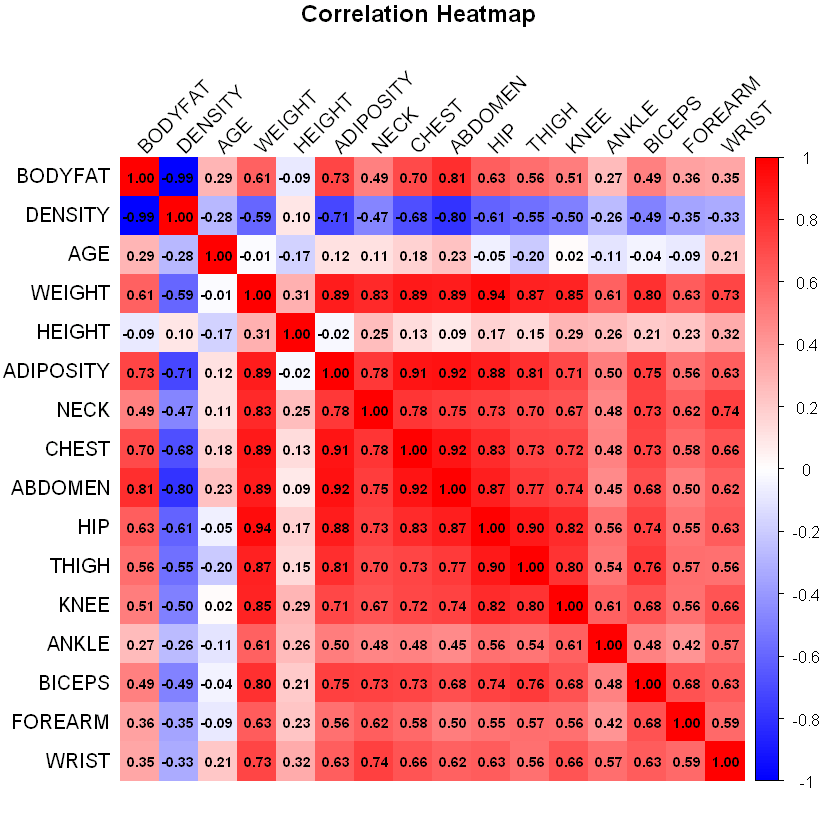

In [5]:
library(corrplot)

#Compute the correlation matrix
cor_matrix <- cor(bodyfat, use = "complete.obs")

corrplot(cor_matrix, method = "color", col = colorRampPalette(c("blue", "white", "red"))(200), 
         tl.col = "black", tl.srt = 45, addCoef.col = "black", number.cex = 0.7, title = "Correlation Heatmap", mar = c(0,0,1,0))

In [6]:
summary(bodyfat)

    BODYFAT         DENSITY           AGE            WEIGHT     
 Min.   : 0.00   Min.   :0.995   Min.   :22.00   Min.   :118.5  
 1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75   1st Qu.:159.0  
 Median :19.00   Median :1.055   Median :43.00   Median :176.5  
 Mean   :18.94   Mean   :1.056   Mean   :44.88   Mean   :178.9  
 3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00   3rd Qu.:197.0  
 Max.   :45.10   Max.   :1.109   Max.   :81.00   Max.   :363.1  
     HEIGHT        ADIPOSITY          NECK           CHEST       
 Min.   :29.50   Min.   :18.10   Min.   :31.10   Min.   : 79.30  
 1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.35  
 Median :70.00   Median :25.05   Median :38.00   Median : 99.65  
 Mean   :70.15   Mean   :25.44   Mean   :37.99   Mean   :100.82  
 3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42   3rd Qu.:105.38  
 Max.   :77.75   Max.   :48.90   Max.   :51.20   Max.   :136.20  
    ABDOMEN            HIP            THIGH            KNEE      
 Min.   : 69.40  

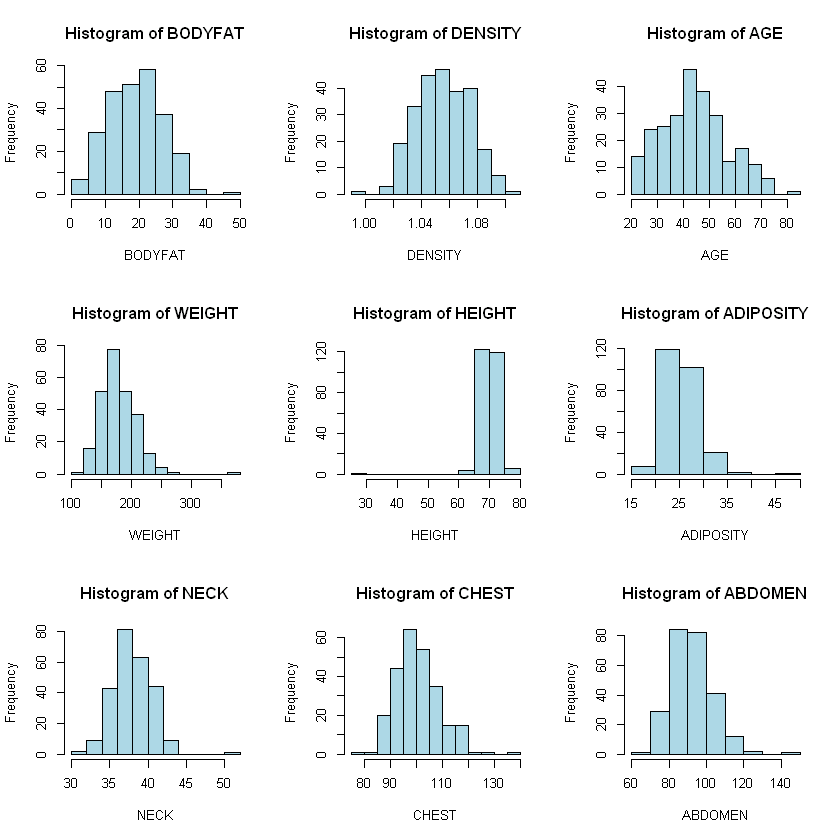

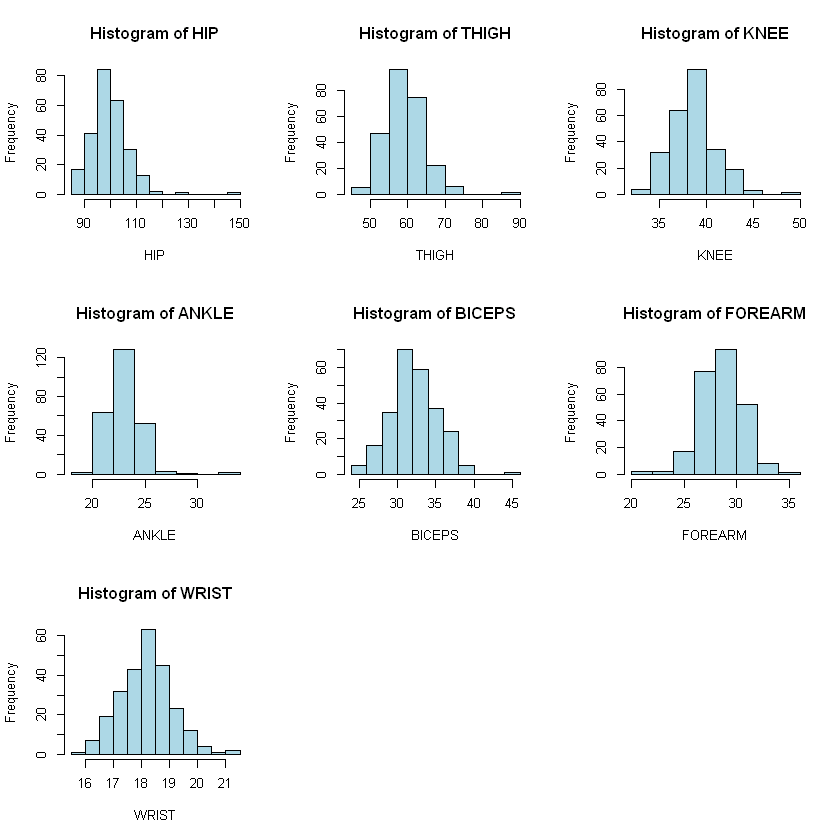

In [7]:
par(mfrow = c(3, 3))

for (colname in names(bodyfat)) {
  if (is.numeric(bodyfat[[colname]])) {
    hist(bodyfat[[colname]], 
         main = paste("Histogram of", colname), 
         xlab = colname, 
         col = "lightblue", 
         border = "black")
  }
}

par(mfrow = c(1, 1))

# Outlier Test

In [8]:
library(DMwR2)

lof_scores <- lofactor(bodyfat[, sapply(bodyfat, is.numeric)], k = 5)

# Set a threshold, the higher the LOF score, the more likely it is an outlier
threshold <- 1.5
outliers <- which(lof_scores > threshold)

bodyfat[outliers, ]

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP   THIGH
5  27.8    1.0340  24  184.25 71.25  25.6      34.4  97.3 100.0   101.9 63.2 
36 38.2    1.0101  49  191.75 65.00  32.0      38.4 118.5 113.1   113.8 61.9 
39 33.8    1.0202  46  363.15 72.25  48.9      51.2 136.2 148.1   147.7 87.3 
41 33.1    1.0217  45  262.75 68.75  39.1      43.2 128.3 126.2   125.6 72.5 
42 31.7    1.0250  44  205.00 29.50  29.9      36.6 106.0 104.3   115.5 70.6 
   KNEE ANKLE BICEPS FOREARM WRIST
5  42.2 24.0  32.2   27.7    17.7 
36 38.3 21.9  32.0   29.8    17.0 
39 49.1 29.6  45.0   29.0    21.4 
41 39.6 26.6  36.4   32.7    21.4 
42 42.5 23.7  33.6   28.7    17.4

In [9]:
lof_table <- data.frame(ID = 1:nrow(bodyfat),LOF_Score = lof_scores)
sorted_lof <- lof_table[order(-lof_table$LOF_Score), ]
head(sorted_lof,5)

ID LOF_Score
39 39 5.616425 
42 42 3.042846 
36 36 1.819269 
41 41 1.808316 
5   5 1.506681

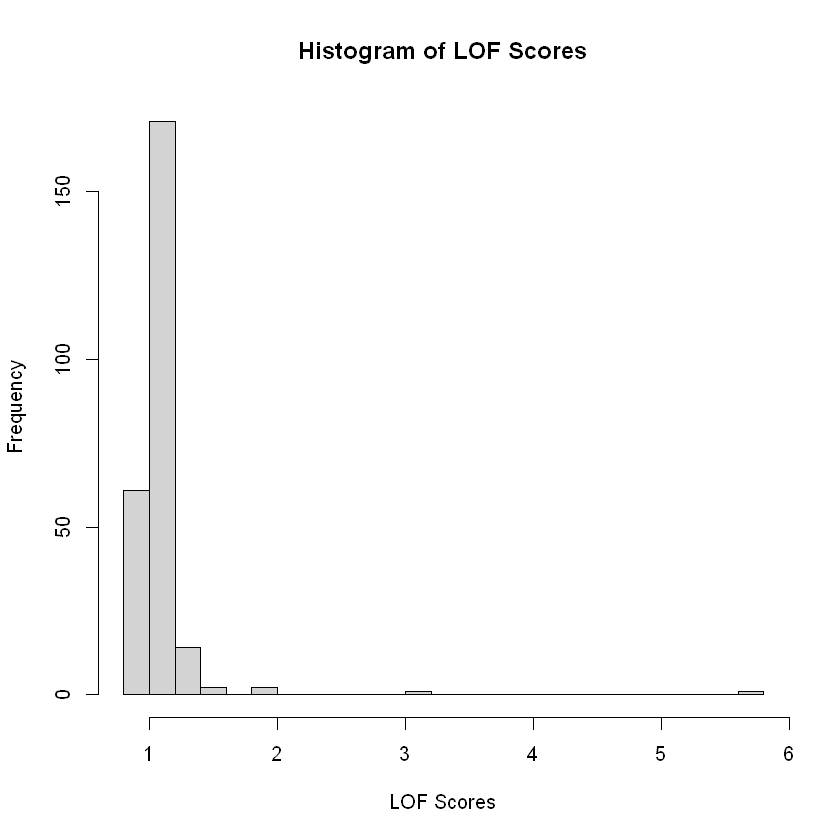

In [10]:
# visualization lof scores
hist(lof_scores, main = "Histogram of LOF Scores", xlab = "LOF Scores", breaks = 30)

The BodyFat value for #5 is somewhat high in the adolescent group because their abdomen measurement is relatively large within the same category, but it is not considered an outlier.

#36 has a BodyFat value of 38.2, ranking second in the entire dataset, even surpassing #39. It is suspected that there may be an error in the BodyFat data, and it needs to be reset. (After further verification, this was found to be correct, so it will be retained.)

#39 leads significantly in terms of 'WEIGHT,' 'NECK,' 'CHEST,' 'HIP,' 'ABDOMEN,' 'THIGH,' 'KNEE,' 'ANKLE,' 'BICEPS,' 'FOREARM,' and 'WRIST.' This is not considered an outlier, and it will be retained.

#41 has a high HIP measurement, and other measurements are also high. They belong to the high BodyFat group, so they will be retained.

#42 has a recorded height of 29.5, indicating an issue with the height data that needs to be corrected.

Summary: The height of #42 needs to be replaced!

From the data summary, we conclude:
Both #31 and #86 have unusual ankle measurements, while their other data tend to be normal. The strange ankle values (chubby ankle) feel like outliers.
Other indicators don’t seem to have very strange values for now (except for bodyfat and density).

The HIP has an extremely high value for #41, but since the other data points are also relatively high, it’s not considered an outlier.
As for the ANKLE measurements, both #31 and #86 have unusual values, while their other data tend to be normal, so the strange ankle values (chubby ankle) feel like outliers.
Other indicators don’t seem to have very strange values for now (except for bodyfat and density).

In [11]:
bodyfat[c(41,31,86),]

BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP   THIGH
41 33.1    1.0217  45  262.75 68.75  39.1      43.2 128.3 126.2   125.6 72.5 
31 12.3    1.0716  32  182.00 73.75  23.6      38.7 100.5  88.7    99.8 57.5 
86 25.8    1.0386  67  167.00 67.50  26.0      36.5  98.9  89.7    96.2 54.7 
   KNEE ANKLE BICEPS FOREARM WRIST
41 39.6 26.6  36.4   32.7    21.4 
31 38.7 33.9  32.5   27.7    18.4 
86 37.8 33.7  32.4   27.7    18.2

## deal with HEIGHT WEIGHT and BMI

In [12]:
# Use height, weight, and BMI to identify problematic points
# Convert weight from pounds to kilograms and height from inches to centimeters
bodyfat$Weight_kg <- bodyfat$WEIGHT * 0.453592
bodyfat$Height_cm <- bodyfat$HEIGHT * 2.54

# Calculate height (in meters) based on weight and BMI
bodyfat$Height_calc_m <- sqrt(bodyfat$Weight_kg / bodyfat$ADIPOSITY)

# Calculate weight (in kg) based on BMI and height
bodyfat$Weight_calc_kg <- bodyfat$ADIPOSITY * ((bodyfat$Height_cm*0.01)^2)

# Convert the calculated height from meters to centimeters
bodyfat$Height_calc_cm <- bodyfat$Height_calc_m * 100

# Compare the calculated height with the original height
comparison <- data.frame(
  Original_Height_cm = bodyfat$Height_cm,
  Calculated_Height_cm = bodyfat$Height_calc_cm
)

# Check for inconsistent data, setting a threshold of more than 3 cm difference
discrepancies <- comparison[abs(comparison$Original_Height_cm - comparison$Calculated_Height_cm) > 3, ]
print(discrepancies)

    Original_Height_cm Calculated_Height_cm
42              74.930             176.3494
163            174.625             185.0723
221            179.070             168.4418


Summary: Detected issues with records 42, 163, and 221 based on height, weight, and BMI!

In [13]:
#42 definitely has an issue with height, let's check what the problems are with 163 and 221 — find similar ones using KNN! Use KNN based on weight, as there are too few height-related factors
bodyfat[c(163,221),]

BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP   ⋯ KNEE
163 13.3    1.0690  33  184.25 68.75  24.4      40.7 98.9  92.1    103.5 ⋯ 37.3
221 12.7    1.0706  54  153.25 70.50  24.5      38.5 99.0  91.8     96.2 ⋯ 38.1
    ANKLE BICEPS FOREARM WRIST Weight_kg Height_cm Height_calc_m Weight_calc_kg
163 23.5  33.5   30.6    19.7  83.57433  174.625   1.850723      74.40509      
221 23.9  31.4   29.9    18.9  69.51297  179.070   1.684418      78.56186      
    Height_calc_cm
163 185.0723      
221 168.4418

In [14]:
# use KNN: "NECK", "CHEST", "ABDOMEN", "HIP", "THIGH","KNEE","BICEPS"  to estimate the weight of 163 and 221
library(VIM)
bodyfat_check <- bodyfat
bodyfat_check$WEIGHT[c(163, 221)] <- NA
bodyfat_check <- kNN(bodyfat_check, variable = "WEIGHT", k = 5, 
                   dist_var = c("NECK", "CHEST", "ABDOMEN", "HIP", "THIGH","KNEE","BICEPS"))

bodyfat_check[c(163,221),c("WEIGHT", "HEIGHT")]
bodyfat[c(163,221),c("WEIGHT", "HEIGHT")]

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:DMwR2':

    kNN


The following object is masked from 'package:datasets':

    sleep




WEIGHT HEIGHT
163 179.0  68.75 
221 175.5  70.50

WEIGHT HEIGHT
163 184.25 68.75 
221 153.25 70.50

#221 likely has an issue with WEIGHT, as there's a 20-pound difference from the KNN estimate, so WEIGHT should be replaced.  
#163 has a 5-pound difference in weight; let's verify with density.

In [15]:
#Use KNN on DENSITY to check the HEIGHT of 163
bodyfat_check <- bodyfat
bodyfat_check$WEIGHT[163] <- NA
bodyfat_check <- kNN(bodyfat_check, variable = "WEIGHT", k = 5, 
                   dist_var = c("DENSITY"))

bodyfat_check[163,c("WEIGHT","HEIGHT")]
bodyfat[163,c("WEIGHT","HEIGHT")]

WEIGHT HEIGHT
163 149.25 68.75

WEIGHT HEIGHT
163 184.25 68.75

#163 and #221 both seem to have issues with their weight. The data will be replaced below.

In [16]:
#replace HEIGHT(42）
rows_to_replace <- 42
bodyfat$Height_cm[rows_to_replace] <- bodyfat$Height_calc_cm[rows_to_replace]
bodyfat$HEIGHT[rows_to_replace] <- bodyfat$Height_calc_cm[rows_to_replace] / 2.54  # inch

In [17]:
#replcae WEIGHT（163,221）
rows_to_replace <- c(163,221)  
bodyfat$Weight_kg[rows_to_replace] <- bodyfat$Weight_calc_kg[rows_to_replace]
bodyfat$WEIGHT[rows_to_replace] <- bodyfat$Weight_calc_kg[rows_to_replace] / 0.453592  # Lb

## bodyfat density processing

Using IQR or z-scores results in too many outliers for the body dimension variables, so I used google to search for the normal range of male data for comparison.

In [18]:
#Set the upper and lower limits of the normal range (based on the range for males in the 1960s in the U.S., with some flexibility)
update_data <- function(){
  bodyfat$Weight_Normal <<- (bodyfat$Weight_kg >= 45 & bodyfat$Weight_kg <= 180)
  bodyfat$Height_Normal <<- (bodyfat$Height_cm >= 135 & bodyfat$Height_cm <= 215)  
  bodyfat$BMI_Normal <<- (bodyfat$ADIPOSITY >= 18 & bodyfat$ADIPOSITY <= 50)       
  bodyfat$BodyFat_Normal <<- (bodyfat$BODYFAT >= 4 & bodyfat$BODYFAT <= 45)
  bodyfat$Density_Normal <<- (bodyfat$DENSITY >= 1 & bodyfat$DENSITY <= 1.100) 
  out_of_range_condition <<- !(bodyfat$Weight_Normal & bodyfat$Height_Normal & bodyfat$BMI_Normal & 
                                 bodyfat$BodyFat_Normal& bodyfat$Density_Normal)
  abnormal_points <<- bodyfat[out_of_range_condition, ]  
  
  }

update_data()
abnormal_points[, c("Weight_kg", "Height_cm", "ADIPOSITY", "BODYFAT", "DENSITY", "Weight_Normal", "Height_Normal", "BMI_Normal", "BodyFat_Normal", "Density_Normal")]

Weight_kg Height_cm ADIPOSITY BODYFAT DENSITY Weight_Normal Height_Normal
172 57.03919  166.37    20.6       1.9    1.0983  TRUE          TRUE         
182 53.75065  172.72    18.1       0.0    1.1089  TRUE          TRUE         
216 99.33665  162.56    37.6      45.1    0.9950  TRUE          TRUE         
    BMI_Normal BodyFat_Normal Density_Normal
172 TRUE       FALSE           TRUE         
182 TRUE       FALSE          FALSE         
216 TRUE       FALSE          FALSE

BODYFAT for #26, #29, #55, and #171 is not within the normal range, but their DENSITY is normal. BODYFAT will be replaced using DENSITY (the BODYFAT range has been expanded by 4, so they are no longer considered outliers).
Both data points for #172 seem to have issues as well.
#182 has a BODYFAT of 0 and a DENSITY of 1.1089, indicating that both data points are problematic.
#216 has a BODYFAT of 45.1 and a DENSITY of 0.9950. Comparing this to #39, it's concluded that both data points for #216 are problematic.

Summary: The data for #172 and #216 are outside the normal range, as well as the earlier #36.

Besides the issues with #182 and #216, check if there are any other cases where BODYFAT and DENSITY show a significant difference despite being within the normal range.

In [19]:
# Compare the original body fat percentage (BODYFAT) with the recalculated body fat percentage (BODYFAT_recalc)
bodyfat$BODYFAT_recalc <- 495 / bodyfat$DENSITY - 450
comparison <- data.frame(
  Original_BODYFAT = bodyfat$BODYFAT,
  Recalculated_BODYFAT = bodyfat$BODYFAT_recalc
)

# Calculate the relative difference (percentage difference)
bodyfat$Relative_Difference <- abs(bodyfat$BODYFAT - bodyfat$BODYFAT_recalc) / bodyfat$BODYFAT * 100

# There are slight differences in the data, identify data points where the relative difference exceeds 15%
large_relative_differences <- bodyfat[bodyfat$Relative_Difference > 15, ]
#large_relative_differences <- bodyfat[abs(bodyfat$BODYFAT - bodyfat$BODYFAT_recalc) > 5, ]

large_relative_differences[,c("BODYFAT","BODYFAT_recalc","DENSITY")]

BODYFAT BODYFAT_recalc DENSITY
9    5.1     4.1284404     1.0900 
26   4.6     3.6706076     1.0911 
29   4.7     3.7121907     1.0910 
48   6.4    14.1350211     1.0665 
50   5.0     4.0034853     1.0903 
55   4.9     3.8785989     1.0906 
76  18.3    14.0915057     1.0666 
96  17.3     0.3684833     1.0991 
171  4.1     3.0477759     1.0926 
172  1.9     0.6965310     1.0983 
182  0.0    -3.6116873     1.1089

#9 is naturally slim, and the difference between the BODYFAT calculated using DENSITY and the BODYFAT in the data is only 1, so it's considered fine.
#50 is naturally slim, and the difference between the BODYFAT calculated using DENSITY and the BODYFAT in the data is only 1, so it's considered fine.
#26, #29, #55, and #171 are naturally slim and have no issues.
Summary: #48, #76, #96, #172, and #182 need to be revised!

In [20]:
bodyfat_check <- bodyfat
bodyfat_check$BODYFAT[c(48,76,96)] <- NA
bodyfat_check <- kNN(bodyfat_check, variable = "BODYFAT", k = 5, 
                   dist_var = c("AGE","WEIGHT","HEIGHT","ADIPOSITY","NECK","CHEST",
                                "ABDOMEN", "HIP", "THIGH","KNEE","BICEPS","FOREARM","WRIST"))

bodyfat_check[c(48,76,96),c("BODYFAT", "DENSITY")]
bodyfat[c(48,76,96),c("BODYFAT", "DENSITY")]

BODYFAT DENSITY
48 11.3    1.0665 
76 11.8    1.0666 
96 25.4    1.0991

BODYFAT DENSITY
48  6.4    1.0665 
76 18.3    1.0666 
96 17.3    1.0991

In [21]:
#check #48, #76, #96's BODYFAT
bodyfat_check <- bodyfat
bodyfat_check$DENSITY[c(48,76,96)] <- NA
bodyfat_check <- kNN(bodyfat_check, variable = "DENSITY", k = 5, 
                   dist_var = c("AGE","WEIGHT","HEIGHT","ADIPOSITY","NECK","CHEST",
                                "ABDOMEN", "HIP", "THIGH","KNEE","BICEPS","FOREARM","WRIST"))

bodyfat_check[c(48,76,96),c("BODYFAT", "DENSITY")]
bodyfat[c(48,76,96),c("BODYFAT", "DENSITY")]

BODYFAT DENSITY
48  6.4    1.0742 
76 18.3    1.0728 
96 17.3    1.0396

BODYFAT DENSITY
48  6.4    1.0665 
76 18.3    1.0666 
96 17.3    1.0991

#48 and #76 have similar data. Comparing them with #90 and calculating with KNN shows that their DENSITY changes are minimal, so the issue is likely with BODYFAT. Replace BODYFAT with the value calculated using DENSITY.
#96 is quite overweight. Comparing them with similar individuals, DENSITY is definitely wrong. Comparing with #180, BODYFAT seems fine, so replace DENSITY with BODYFAT! Let’s proceed!

In [22]:
# Recalculate DENSITY using the Siri equation: DENSITY = 495 / (450 + BODYFAT)
bodyfat$DENSITY_recalc <- 495 / (bodyfat$BODYFAT + 450)
# replace #96 DENSITY
bodyfat$DENSITY[96] <- bodyfat$DENSITY_recalc[96]

In [23]:
# Recalculate body fat percentage using the Siri equation (495 / DENSITY - 450)
bodyfat$BODYFAT_recalc <- 495 / bodyfat$DENSITY - 450
# Replace the BODYFAT for #26, #29, #55, #171, #48, and #76.
bodyfat$BODYFAT[c(48,76)] <- bodyfat$BODYFAT_recalc[c(48,76)]

For #172, #182, and #216, both BODYFAT and DENSITY are completely incorrect. The difference calculated by the current model is too large, so we'll fit DENSITY using other data and estimate these two values.

In [24]:
# Fit a full model using other data to estimate columns 182 and 216
# Remove rows 172 and 182
bodyfat_check <- bodyfat[-c(172,182), ]

In [25]:
# Build a linear regression model with DENSITY as the dependent variable and all other variables as independent variables
DENSITY_replace_model <- lm(DENSITY ~ AGE+WEIGHT+HEIGHT+ADIPOSITY+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST, data = bodyfat_check)

# Extract the data for rows 182 and 216, removing the BODYFAT and DENSITY columns
data_to_predict <- bodyfat[c(172,182), c("AGE", "WEIGHT", "HEIGHT", "ADIPOSITY", "NECK", "CHEST", "ABDOMEN", "HIP", "THIGH", "KNEE", "ANKLE", "BICEPS", "FOREARM", "WRIST")]

In [26]:
summary(DENSITY_replace_model)


Call:
lm(formula = DENSITY ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST, data = bodyfat_check)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0216546 -0.0067147  0.0002738  0.0065615  0.0246730 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.3619154  0.1200135  11.348  < 2e-16 ***
AGE         -0.0001347  0.0000717  -1.879  0.06145 .  
WEIGHT       0.0008229  0.0003290   2.501  0.01306 *  
HEIGHT      -0.0031684  0.0017121  -1.851  0.06549 .  
ADIPOSITY   -0.0046944  0.0024303  -1.932  0.05461 .  
NECK         0.0010435  0.0005191   2.010  0.04558 *  
CHEST        0.0001167  0.0002374   0.491  0.62365    
ABDOMEN     -0.0020989  0.0002048 -10.248  < 2e-16 ***
HIP          0.0005722  0.0003236   1.768  0.07837 .  
THIGH       -0.0005456  0.0003261  -1.673  0.09565 .  
KNEE        -0.0002942  0.0005535  -0.531  0.59558    
ANKLE       -0.0002849 

In [27]:
#calculate the DENSITY of #172, #182
predicted_DENSITY <- predict(DENSITY_replace_model, newdata = data_to_predict)
predicted_DENSITY

172      182 
1.083185 1.089028

In [28]:
# calculate the BODYFAT of #172 #182
495/predicted_DENSITY[1:2] -450

172      182 
6.985503 4.533625

In [29]:
# replace 172，182
bodyfat$DENSITY[172] <- predicted_DENSITY[1]
bodyfat$BODYFAT[172] <- 495/predicted_DENSITY[1] -450

bodyfat$DENSITY[182] <- predicted_DENSITY[2]
bodyfat$BODYFAT[182] <- 495/predicted_DENSITY[2] -450

In [30]:
delete_columns <- function(){
  bodyfat$Weight_kg <<- NULL
  bodyfat$Height_cm <<- NULL
  bodyfat$Height_calc_m <<- NULL
  bodyfat$Height_calc_cm <<- NULL
  bodyfat$Weight_calc_kg <<- NULL
  bodyfat$Weight_Normal <<- NULL
  bodyfat$Height_Normal <<- NULL
  bodyfat$BMI_Normal <<- NULL
  bodyfat$BodyFat_Normal <<- NULL
  bodyfat$Density_Normal <<- NULL
  bodyfat$HIP_Normal <<- NULL
  bodyfat$ABDOMEN_Normal <<- NULL
  bodyfat$THIGH_Normal <<- NULL
  bodyfat$KNEE_Normal <<- NULL
  bodyfat$ANKLE_Normal <<- NULL
  bodyfat$BICEPS_Normal <<- NULL
  bodyfat$FOREARM_Normal <<- NULL
  bodyfat$WRIST_Normal <<- NULL
  bodyfat$BODYFAT_recalc <<- NULL
  bodyfat$Relative_Difference <<- NULL
  bodyfat$Calculated_BFP <<- NULL
  bodyfat$BFP_USC <<- NULL
  bodyfat$BFP_SI <<- NULL
  bodyfat$DENSITY_recalc <<- NULL
}

delete_columns()


First, remove the data, then standardize WEIGHT, HEIGHT, ADIPOSITY, NECK, CHEST, ABDOMEN, HIP, THIGH, KNEE, ANKLE, BICEPS, FOREARM, and WRIST. Use a QQ plot to check how well the standardization has been performed.

target_sd_cols <- c("WEIGHT", "HEIGHT", "ADIPOSITY", "NECK", "CHEST", 
                          "ABDOMEN", "HIP", "THIGH", "KNEE", "ANKLE", 
                          "BICEPS", "FOREARM", "WRIST")

bodyfat[target_sd_cols] <- scale(bodyfat[target_sd_cols])


par(mfrow = c(3,3))

for (col in target_sd_cols) {
  qqnorm(bodyfat[[col]], main = paste("Q-Q Plot for", col))
  qqline(bodyfat[[col]], col = "red")
}

par(mfrow = c(1, 1))

In [31]:
write.csv(bodyfat, "bodyfat_amend.csv", row.names = FALSE)

## Check cook distance and leverage

read the data into bodyfat

In [32]:
rm(list=ls())
bodyfat <- read.csv("bodyfat_amend.csv")
head(bodyfat)

BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP   THIGH
1 12.6    1.0708  23  154.25 67.75  23.7      36.2  93.1  85.2    94.5 59.0 
2  6.9    1.0853  22  173.25 72.25  23.4      38.5  93.6  83.0    98.7 58.7 
3 24.6    1.0414  22  154.00 66.25  24.7      34.0  95.8  87.9    99.2 59.6 
4 10.9    1.0751  26  184.75 72.25  24.9      37.4 101.8  86.4   101.2 60.1 
5 27.8    1.0340  24  184.25 71.25  25.6      34.4  97.3 100.0   101.9 63.2 
6 20.6    1.0502  24  210.25 74.75  26.5      39.0 104.5  94.4   107.8 66.0 
  KNEE ANKLE BICEPS FOREARM WRIST
1 37.3 21.9  32.0   27.4    17.1 
2 37.3 23.4  30.5   28.9    18.2 
3 38.9 24.0  28.8   25.2    16.6 
4 37.3 22.8  32.4   29.4    18.2 
5 42.2 24.0  32.2   27.7    17.7 
6 42.0 25.6  35.7   30.6    18.8

Remove DENSITY – difficult to measure
Remove BMI – highly collinear (BMI is 300+ and weight is also 300+; if BMI is not removed)

In [33]:
bodyfat$DENSITY <- NULL
bodyfat$ADIPOSITY <- NULL

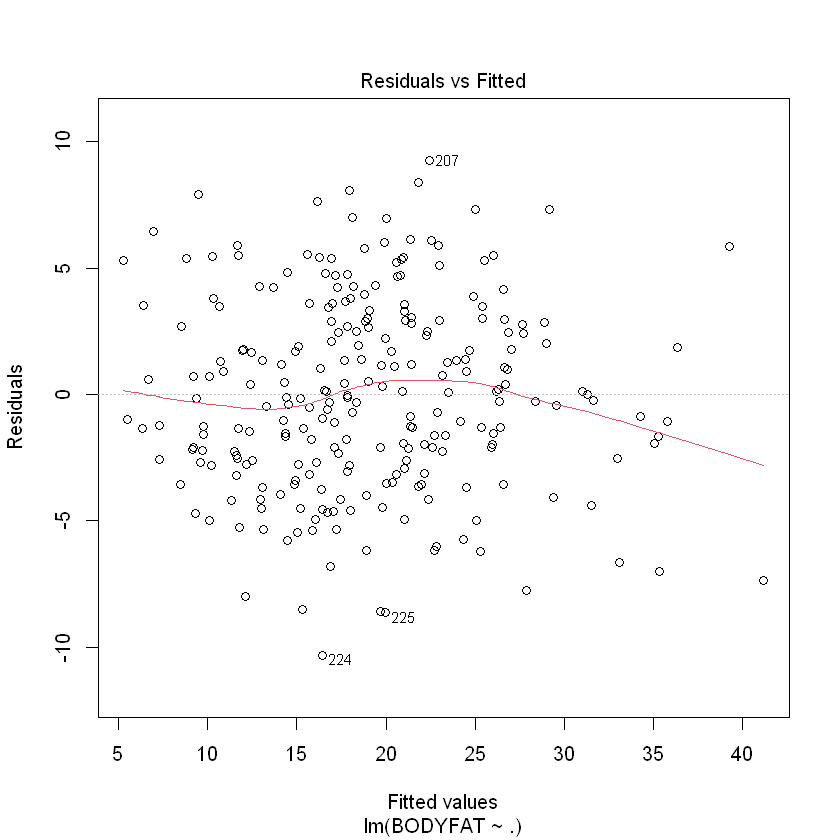

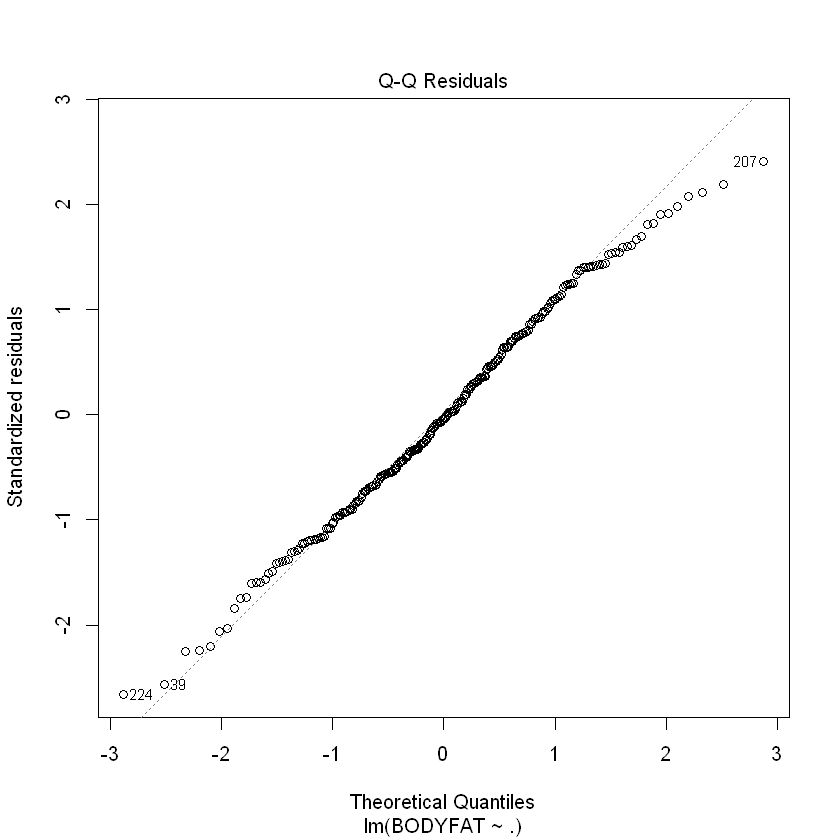

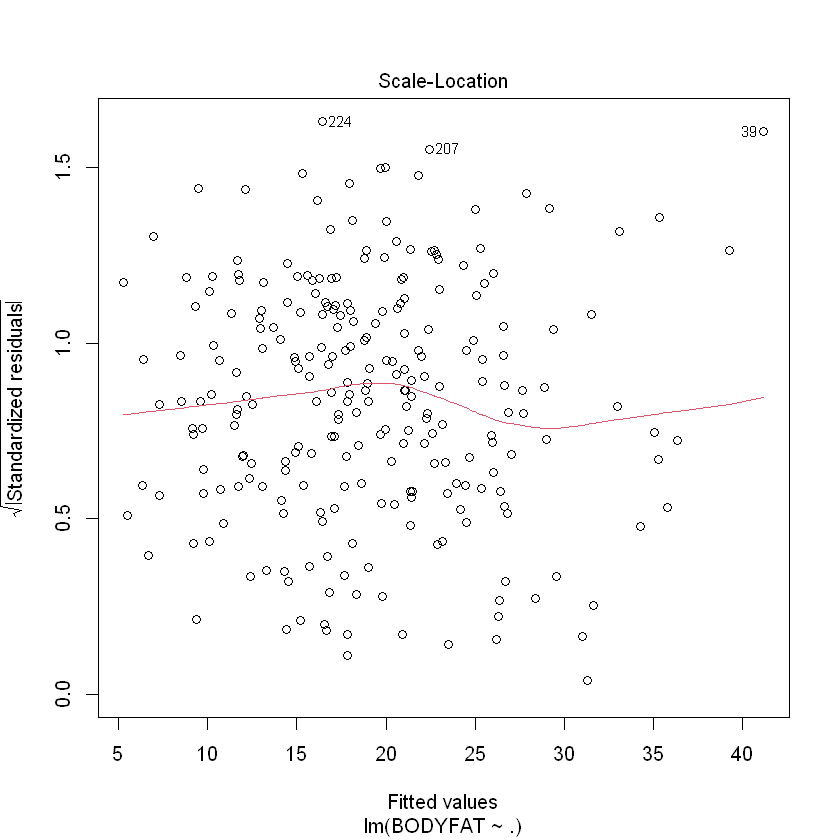

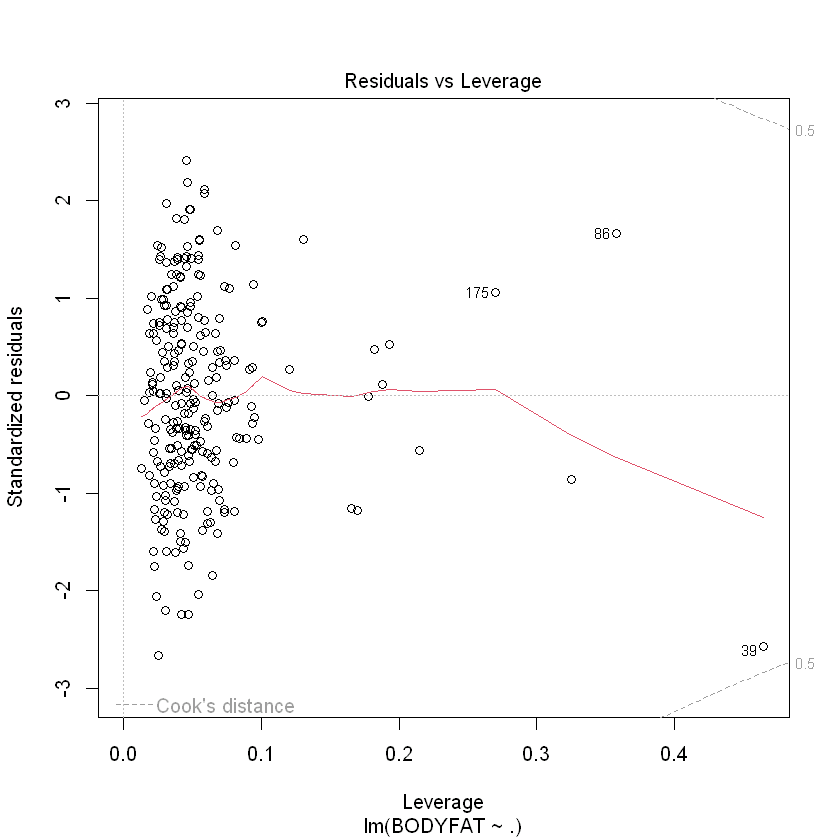

In [34]:
library(MASS)

full_model <- lm(BODYFAT ~ ., data = bodyfat)
plot(full_model)

 31  39  54  82  86 128 140 163 175 207 216 231 
 31  39  54  82  86 128 140 163 175 207 216 231 


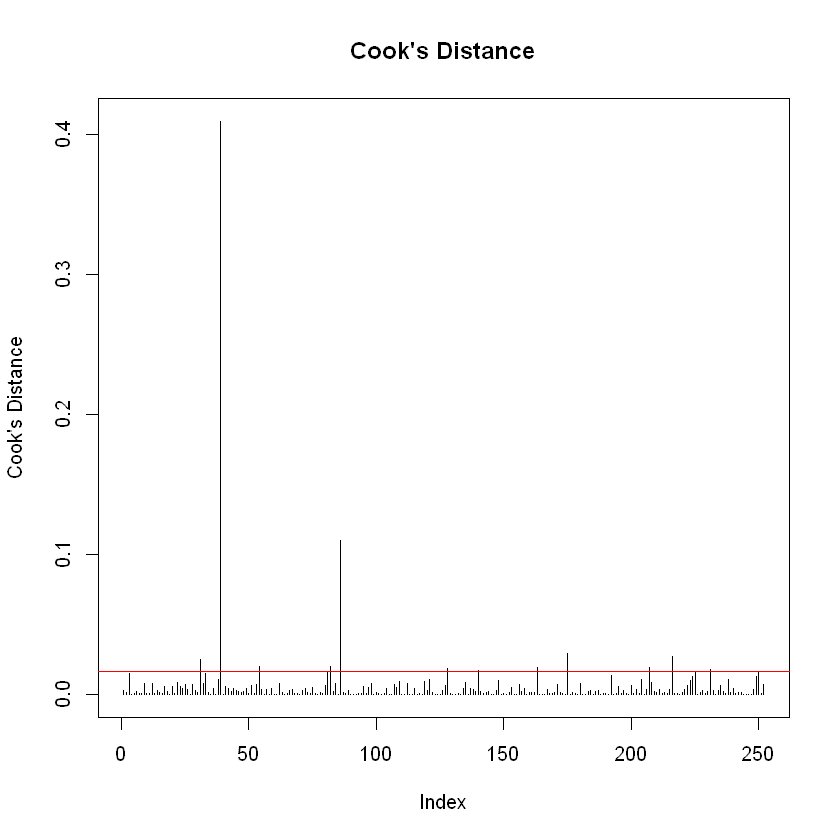

In [35]:
#  Calculate Cook's distance
cooksd <- cooks.distance(full_model)

# Plot the Cook's distance graph
plot(cooksd, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4/(nrow(bodyfat)-length(coef(full_model))), col = "red") 

# Identify points with high influence
influential_points <- which(cooksd > 4/(nrow(bodyfat)-length(coef(full_model))))
print(influential_points)

  5  31  36  39  41  54  86 106 159 163 175 206 216 
  5  31  36  39  41  54  86 106 159 163 175 206 216 


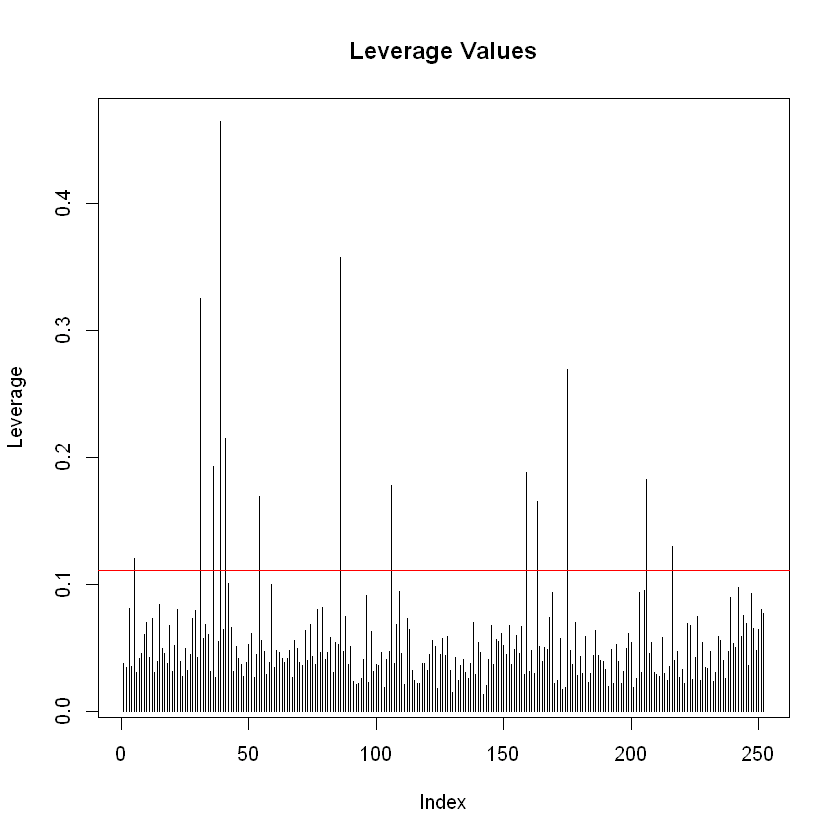

In [36]:
leverage <- hatvalues(full_model)

plot(leverage, type = "h", main = "Leverage Values", ylab = "Leverage")
abline(h = 2*length(coef(full_model))/nrow(bodyfat), col = "red")

# Identify high leverage points
high_leverage_points <- which(leverage > 2*length(coef(full_model))/nrow(bodyfat))
print(high_leverage_points)

In [37]:
intersect(influential_points, high_leverage_points)

[1]  31  39  54  86 163 175 216

The points that appear as outliers in both detections are output and removed.

In [38]:
both_outliers <- intersect(high_leverage_points, influential_points)

outlier_table <- data.frame(
  ID = both_outliers,
  Leverage = leverage[both_outliers],
  CooksDistance = cooksd[both_outliers]
)

outlier_table

ID  Leverage  CooksDistance
31   31 0.3249275 0.02541322   
39   39 0.4650398 0.40944568   
54   54 0.1694536 0.02010497   
86   86 0.3579093 0.10982874   
163 163 0.1656113 0.01911016   
175 175 0.2696176 0.02943131   
216 216 0.1301039 0.02726642

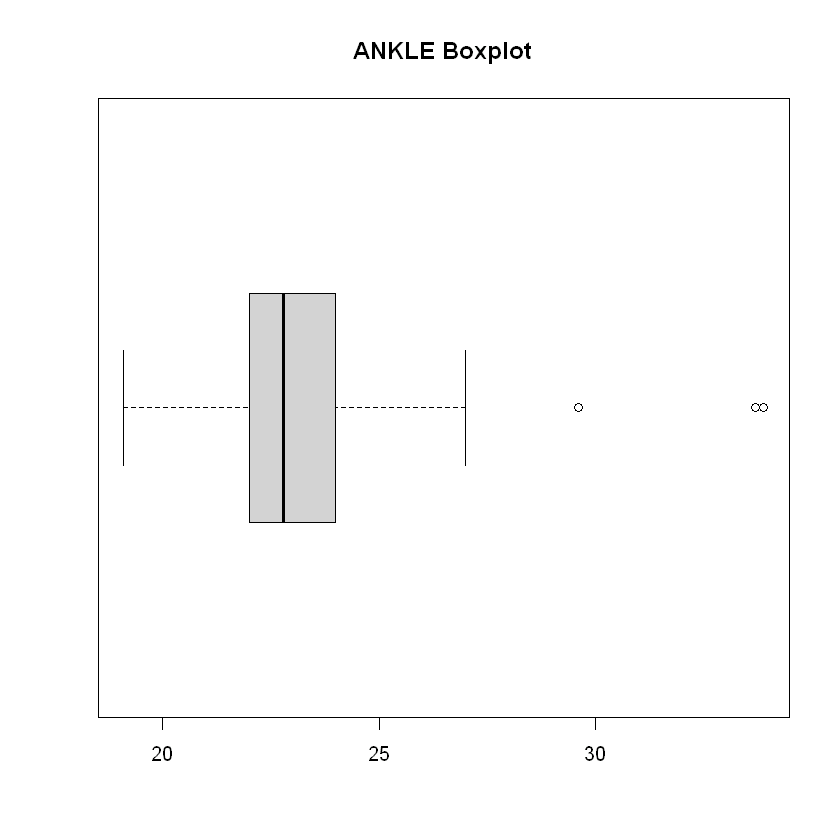

In [39]:
boxplot(bodyfat$ANKLE, main = "ANKLE Boxplot", horizontal = TRUE)

# ankle processing
using KNN fit the values of ankle

In [40]:
rm(list=ls())
bodyfat <- read.csv("bodyfat_amend.csv")
# using KNN fit the values of ankle（replace the values successfully）
numeric_columns <- sapply(bodyfat, is.numeric)
ankle_correlations <- cor(bodyfat$ANKLE, bodyfat[, numeric_columns], use = "complete.obs")
ankle_correlations
library(VIM)
bodyfat$ANKLE[c(31, 86)] <- NA
bodyfat <- kNN(bodyfat, variable = "ANKLE", k = 5, 
                   dist_var = c("WEIGHT",  "ADIPOSITY","HIP", "KNEE", "ABDOMEN"))
bodyfat[c(31,86),]
bodyfat$ANKLE_imp <- NULL

BODYFAT   DENSITY   AGE        WEIGHT    HEIGHT    ADIPOSITY NECK     
[1,] 0.2640617 -0.263065 -0.1050581 0.6149297 0.3930794 0.5003166 0.4778924
     CHEST     ABDOMEN   HIP       THIGH     KNEE      ANKLE BICEPS    FOREARM
[1,] 0.4829879 0.4532227 0.5583868 0.5397971 0.6116082 1     0.4848545 0.41905
     WRIST    
[1,] 0.5661946

BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP  THIGH
31 12.3    1.0716  32  182    73.75  23.6      38.7 100.5 88.7    99.8 57.5 
86 25.8    1.0386  67  167    67.50  26.0      36.5  98.9 89.7    96.2 54.7 
   KNEE ANKLE BICEPS FOREARM WRIST ANKLE_imp
31 38.7 23.8  32.5   27.7    18.4  TRUE     
86 37.8 22.5  32.4   27.7    18.2  TRUE

In [41]:
write.csv(bodyfat, "bodyfat_amend.csv", row.names = FALSE)
head(bodyfat)

BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP   THIGH
1 12.6    1.0708  23  154.25 67.75  23.7      36.2  93.1  85.2    94.5 59.0 
2  6.9    1.0853  22  173.25 72.25  23.4      38.5  93.6  83.0    98.7 58.7 
3 24.6    1.0414  22  154.00 66.25  24.7      34.0  95.8  87.9    99.2 59.6 
4 10.9    1.0751  26  184.75 72.25  24.9      37.4 101.8  86.4   101.2 60.1 
5 27.8    1.0340  24  184.25 71.25  25.6      34.4  97.3 100.0   101.9 63.2 
6 20.6    1.0502  24  210.25 74.75  26.5      39.0 104.5  94.4   107.8 66.0 
  KNEE ANKLE BICEPS FOREARM WRIST
1 37.3 21.9  32.0   27.4    17.1 
2 37.3 23.4  30.5   28.9    18.2 
3 38.9 24.0  28.8   25.2    16.6 
4 37.3 22.8  32.4   29.4    18.2 
5 42.2 24.0  32.2   27.7    17.7 
6 42.0 25.6  35.7   30.6    18.8

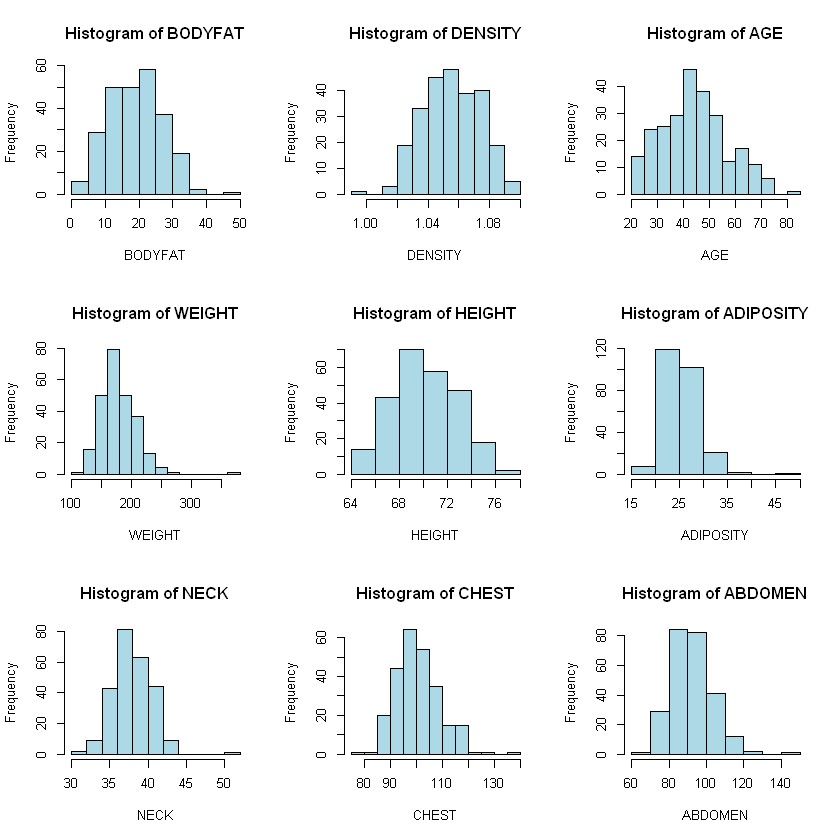

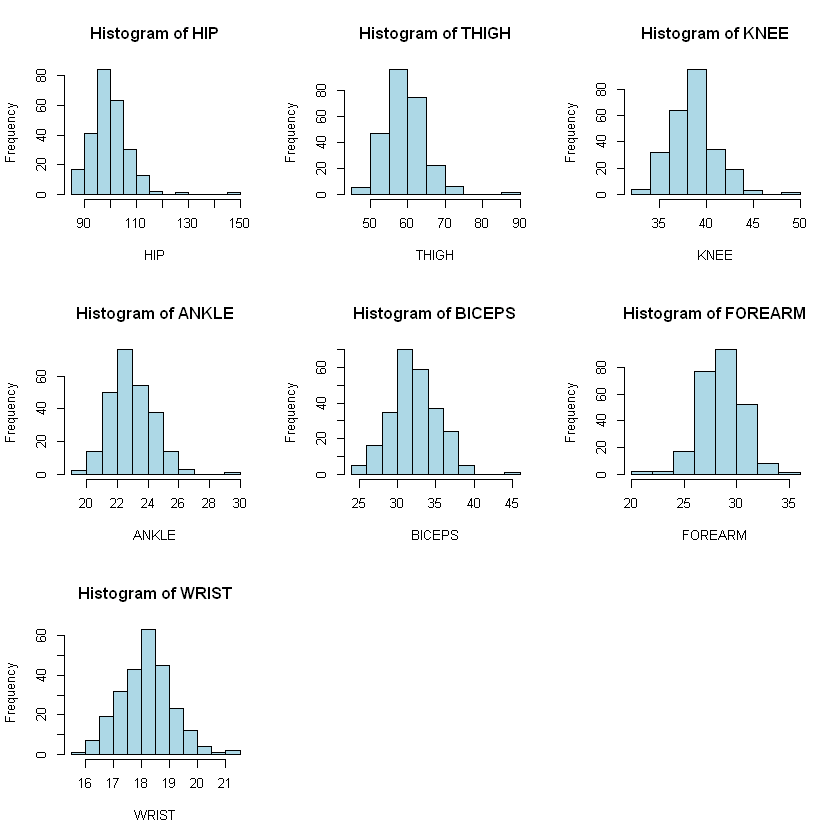

In [42]:
par(mfrow = c(3, 3))

for (colname in names(bodyfat)) {
  if (is.numeric(bodyfat[[colname]])) {
    hist(bodyfat[[colname]], 
         main = paste("Histogram of", colname), 
         xlab = colname, 
         col = "lightblue", 
         border = "black")
  }
}

par(mfrow = c(1, 1)) 

## Fit the full model in MODEL – perform variable selection (to meet the requirement for simplicity)
read the data into bodyfat

In [43]:
rm(list=ls())
bodyfat <- read.csv("bodyfat_amend.csv")
head(bodyfat)

BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP   THIGH
1 12.6    1.0708  23  154.25 67.75  23.7      36.2  93.1  85.2    94.5 59.0 
2  6.9    1.0853  22  173.25 72.25  23.4      38.5  93.6  83.0    98.7 58.7 
3 24.6    1.0414  22  154.00 66.25  24.7      34.0  95.8  87.9    99.2 59.6 
4 10.9    1.0751  26  184.75 72.25  24.9      37.4 101.8  86.4   101.2 60.1 
5 27.8    1.0340  24  184.25 71.25  25.6      34.4  97.3 100.0   101.9 63.2 
6 20.6    1.0502  24  210.25 74.75  26.5      39.0 104.5  94.4   107.8 66.0 
  KNEE ANKLE BICEPS FOREARM WRIST
1 37.3 21.9  32.0   27.4    17.1 
2 37.3 23.4  30.5   28.9    18.2 
3 38.9 24.0  28.8   25.2    16.6 
4 37.3 22.8  32.4   29.4    18.2 
5 42.2 24.0  32.2   27.7    17.7 
6 42.0 25.6  35.7   30.6    18.8

In [44]:
bodyfat$DENSITY <- NULL

In [45]:
bodyfat$ADIPOSITY <- NULL

In [46]:
head(bodyfat)

BODYFAT AGE WEIGHT HEIGHT NECK CHEST ABDOMEN HIP   THIGH KNEE ANKLE BICEPS
1 12.6    23  154.25 67.75  36.2  93.1  85.2    94.5 59.0  37.3 21.9  32.0  
2  6.9    22  173.25 72.25  38.5  93.6  83.0    98.7 58.7  37.3 23.4  30.5  
3 24.6    22  154.00 66.25  34.0  95.8  87.9    99.2 59.6  38.9 24.0  28.8  
4 10.9    26  184.75 72.25  37.4 101.8  86.4   101.2 60.1  37.3 22.8  32.4  
5 27.8    24  184.25 71.25  34.4  97.3 100.0   101.9 63.2  42.2 24.0  32.2  
6 20.6    24  210.25 74.75  39.0 104.5  94.4   107.8 66.0  42.0 25.6  35.7  
  FOREARM WRIST
1 27.4    17.1 
2 28.9    18.2 
3 25.2    16.6 
4 29.4    18.2 
5 27.7    17.7 
6 30.6    18.8

#Splitting data
set.seed(321)
train_index <- sample(1:nrow(bodyfat), 0.7 * nrow(bodyfat))#70:30
train_data <- bodyfat[train_index, ]
test_data <- bodyfat[-train_index, ]

# Linear model

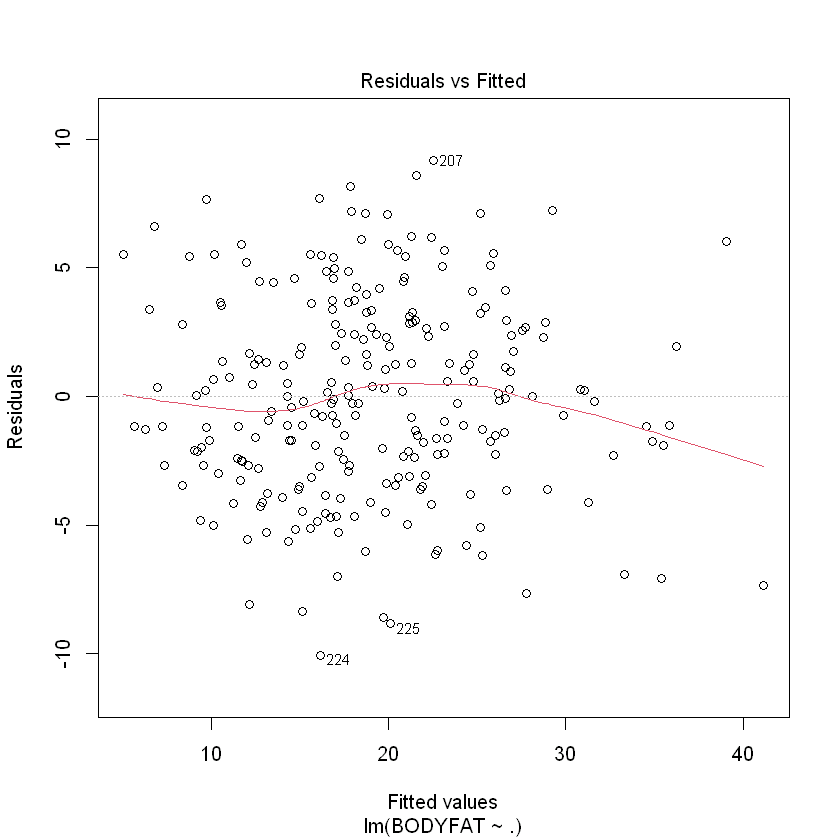

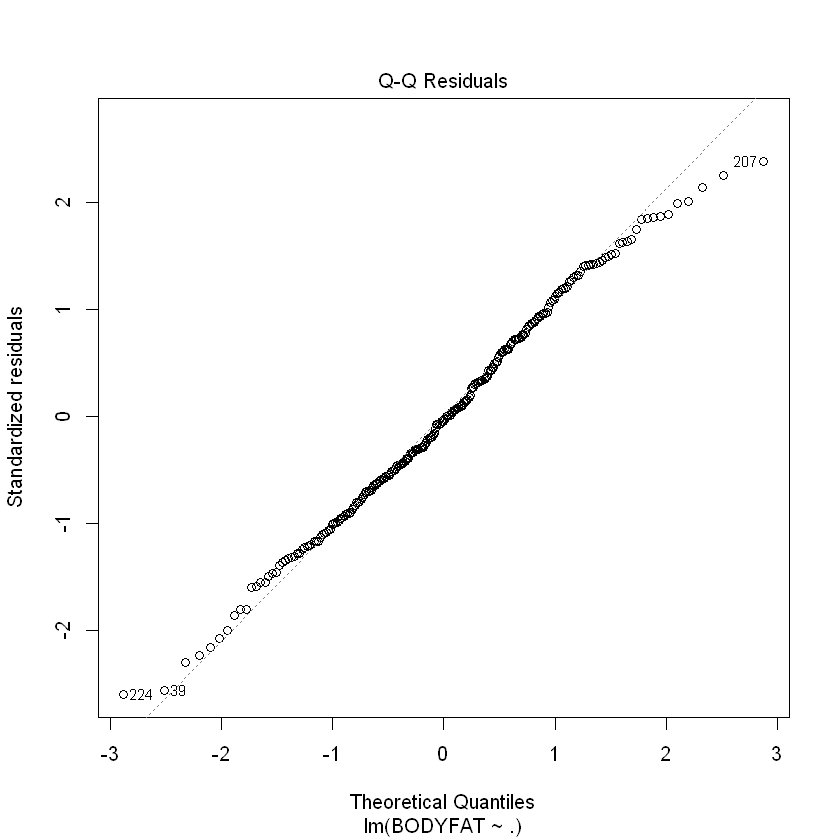

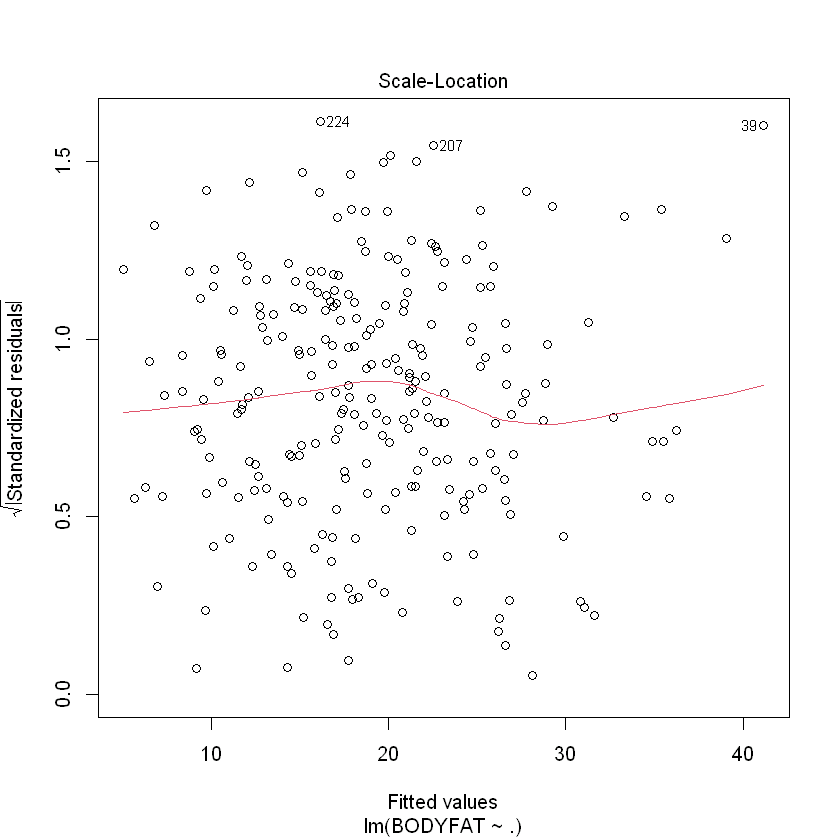

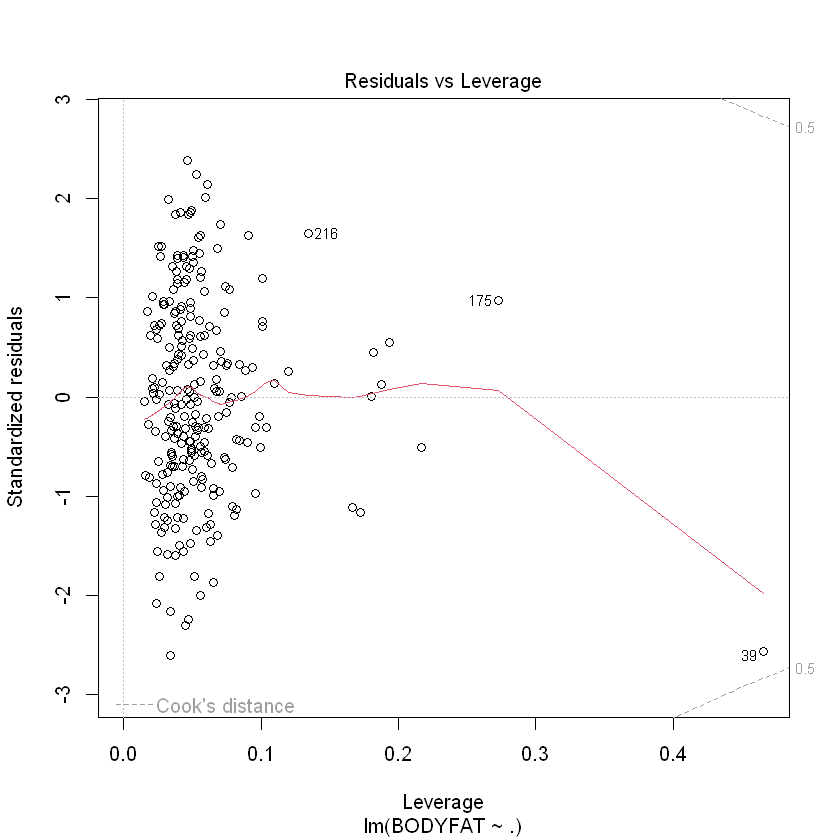

In [47]:
library(MASS)

full_model <- lm(BODYFAT ~ ., data = bodyfat)
plot(full_model)

  3  39  54  81  82 128 140 163 175 207 216 225 231 250 
  3  39  54  81  82 128 140 163 175 207 216 225 231 250 


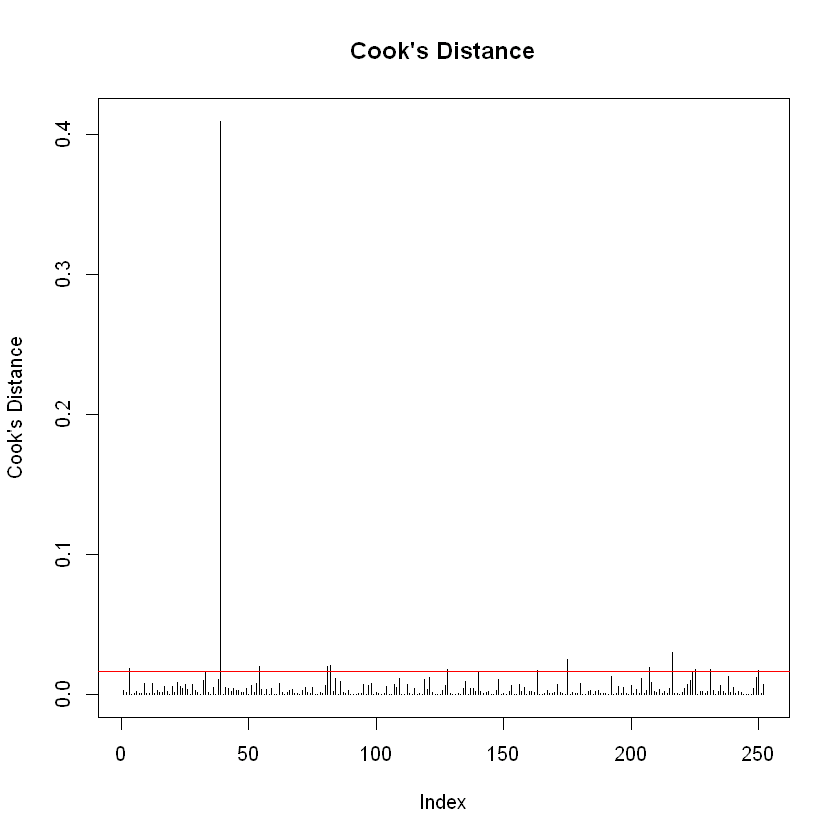

In [48]:
#  Calculate Cook's distance
cooksd <- cooks.distance(full_model)

# Plot the Cook's distance graph
plot(cooksd, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4/(nrow(bodyfat)-length(coef(full_model))), col = "red") 

# Identify points with high influence
influential_points <- which(cooksd > 4/(nrow(bodyfat)-length(coef(full_model))))
print(influential_points)

  5  36  39  41  54 106 159 163 175 206 216 
  5  36  39  41  54 106 159 163 175 206 216 


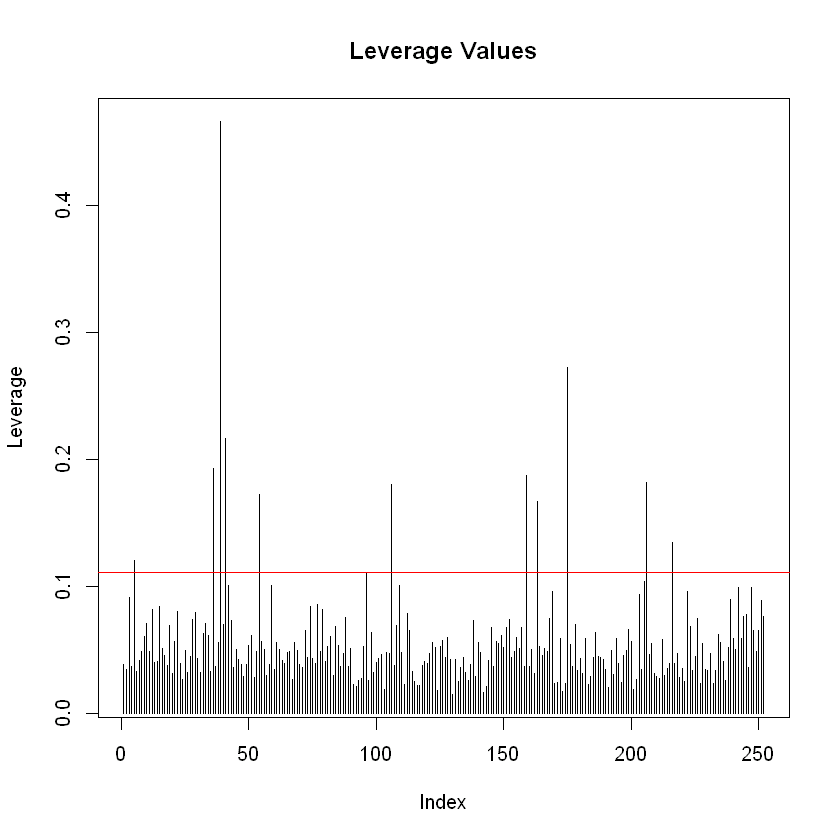

In [49]:
leverage <- hatvalues(full_model)

plot(leverage, type = "h", main = "Leverage Values", ylab = "Leverage")
abline(h = 2*length(coef(full_model))/nrow(bodyfat), col = "red")

# Identify high leverage points
high_leverage_points <- which(leverage > 2*length(coef(full_model))/nrow(bodyfat))
print(high_leverage_points)

In [50]:
intersect(influential_points, high_leverage_points)

[1]  39  54 163 175 216

The points that appear as outliers in both detections are output and removed.

In [51]:
both_outliers <- intersect(high_leverage_points, influential_points)

outlier_table <- data.frame(
  ID = both_outliers,
  Leverage = leverage[both_outliers],
  CooksDistance = cooksd[both_outliers]
)

outlier_table

ID  Leverage  CooksDistance
39   39 0.4662649 0.40908546   
54   54 0.1721709 0.02017652   
163 163 0.1665466 0.01750888   
175 175 0.2725950 0.02520799   
216 216 0.1341476 0.03007224

In [52]:
#remove the outliers
#bodyfat <- bodyfat[-c(54,163,175),]
outliers_used_for_test <- bodyfat[c(39,216),]
head(outliers_used_for_test)
cleared_bodyfat <- bodyfat[-c(39,54,163,216,175),]
#cleared_bodyfat

BODYFAT AGE WEIGHT HEIGHT NECK CHEST ABDOMEN HIP   THIGH KNEE ANKLE BICEPS
39  33.8    46  363.15 72.25  51.2 136.2 148.1   147.7 87.3  49.1 29.6  45.0  
216 45.1    51  219.00 64.00  41.2 119.8 122.1   112.8 62.5  36.9 23.6  34.7  
    FOREARM WRIST
39  29.0    21.4 
216 29.1    18.4

### best subset selection

In [53]:
# install.packages("leaps")
library(leaps)

best_subset <- regsubsets(BODYFAT ~ ., data = cleared_bodyfat, nbest = 1, nvmax = 13)

best_subset_summary <- summary(best_subset)


# accurcy1：leave one out and rmse

In [54]:
loo_rmse <- numeric(13)

models <- list()

best_subset_summary <- summary(best_subset)

for (i in 1:13) {
  vars <- names(coef(best_subset, id = i))

  formula <- as.formula(paste("BODYFAT ~", paste(vars[-1], collapse = " + ")))

  squared_errors <- numeric(nrow(cleared_bodyfat))

  for (j in 1:nrow(cleared_bodyfat)) {
    training_data <- cleared_bodyfat[-j, ]
    test_data <- cleared_bodyfat[j, ]
    
    model <- lm(formula, data = training_data)

    prediction <- predict(model, newdata = test_data)
      
    squared_errors[j] <- (test_data$BODYFAT - prediction)^2
  }
  
  loo_rmse[i] <- sqrt(mean(squared_errors))
}

In [55]:
for (i in 1:13) {
  print(paste("Model", i, "loo_rmse:", loo_rmse[i]))
}

[1] "Model 1 loo_rmse: 4.30608438025782"
[1] "Model 2 loo_rmse: 4.00885931566211"
[1] "Model 3 loo_rmse: 3.95672452011293"
[1] "Model 4 loo_rmse: 3.93558344712802"
[1] "Model 5 loo_rmse: 3.93296721843254"
[1] "Model 6 loo_rmse: 3.92655711195017"
[1] "Model 7 loo_rmse: 3.92100176033714"
[1] "Model 8 loo_rmse: 3.92042256909308"
[1] "Model 9 loo_rmse: 3.92865881130703"
[1] "Model 10 loo_rmse: 3.94269036337207"
[1] "Model 11 loo_rmse: 3.95447308179006"
[1] "Model 12 loo_rmse: 3.96798851474231"
[1] "Model 13 loo_rmse: 3.98479393457996"


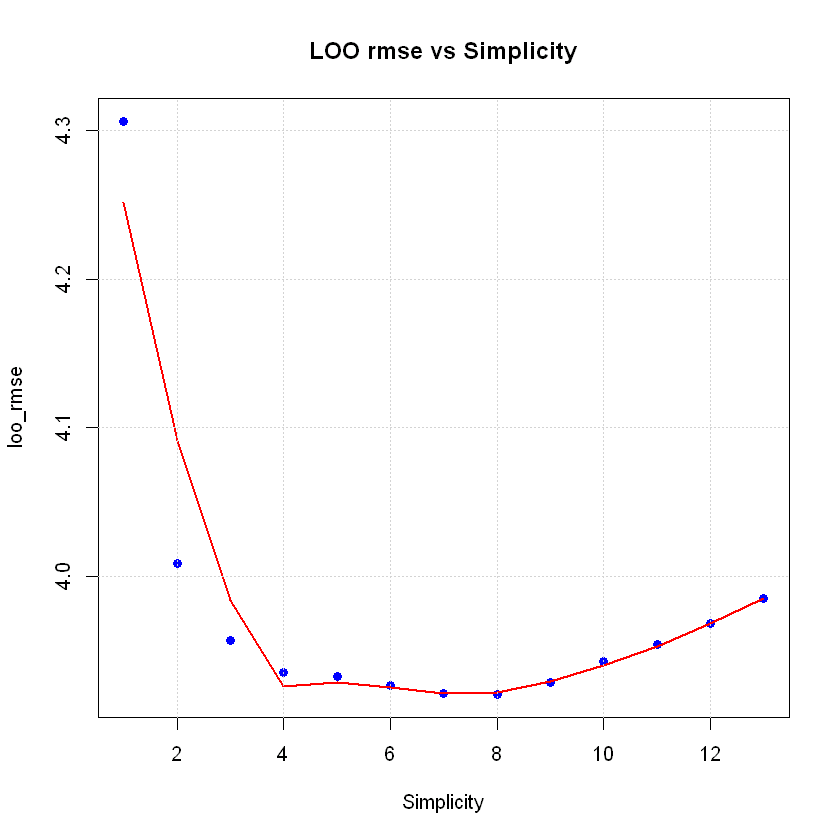

In [56]:
simplicity <- 1:13

plot(simplicity, loo_rmse, type = "p", pch = 19, col = "blue", 
     xlab = "Simplicity", ylab = "loo_rmse", 
     main = "LOO rmse vs Simplicity")

loess_fit <- loess(loo_rmse ~ simplicity)
smooth_curve <- predict(loess_fit)

lines(simplicity, smooth_curve, col = "red", lwd = 2)

grid()

# accurcy 2: Using R^2 and rmse for whole model

In [57]:
R_square <- numeric(13)
rmse <- numeric(13)
for (i in 1:13) {
    vars <- names(coef(best_subset, id = i))
  
    formula <- as.formula(paste("BODYFAT ~", paste(vars[-1], collapse = " + ")))
  
    model <- lm(formula, data = cleared_bodyfat)
    
    R_square[i] <- summary(model)$r.squared

    predictions <- predict(model, cleared_bodyfat)
    residuals <- cleared_bodyfat$BODYFAT - predictions
    rmse[i] <- sqrt(mean(residuals^2))
}

In [58]:
# Output the R^2 values
print(R_square)

 [1] 0.6672415 0.7139825 0.7237054 0.7287060 0.7312434 0.7331351 0.7359582
 [8] 0.7379652 0.7388239 0.7392128 0.7397018 0.7397832 0.7397841


In [59]:
# Output the mse
print(rmse)

 [1] 4.273960 3.962435 3.894503 3.859099 3.841010 3.827468 3.807170 3.792672
 [9] 3.786453 3.783633 3.780084 3.779493 3.779487


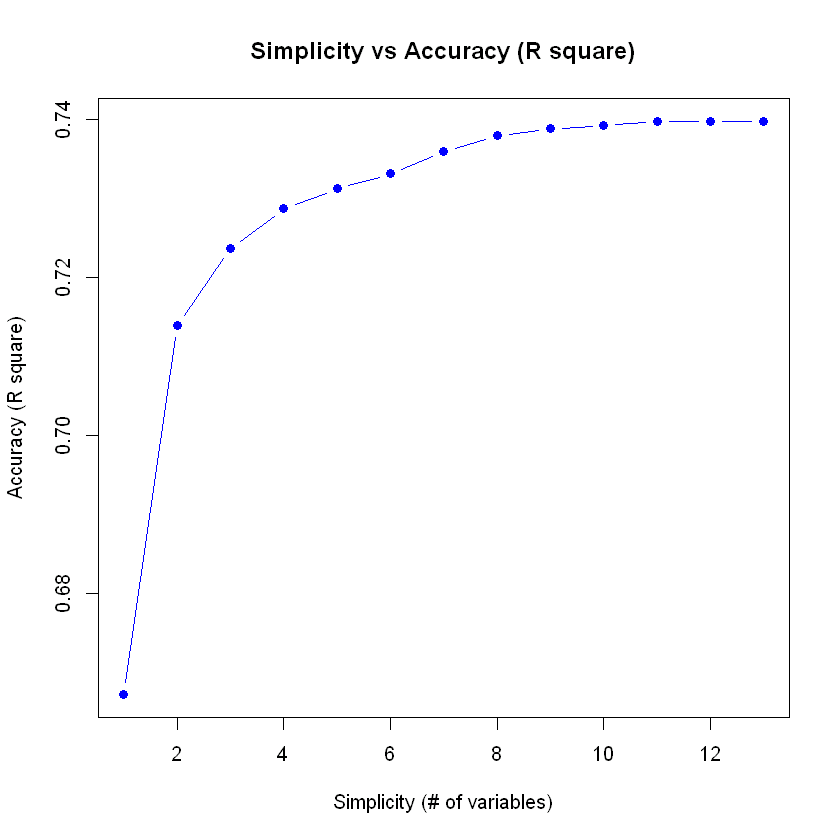

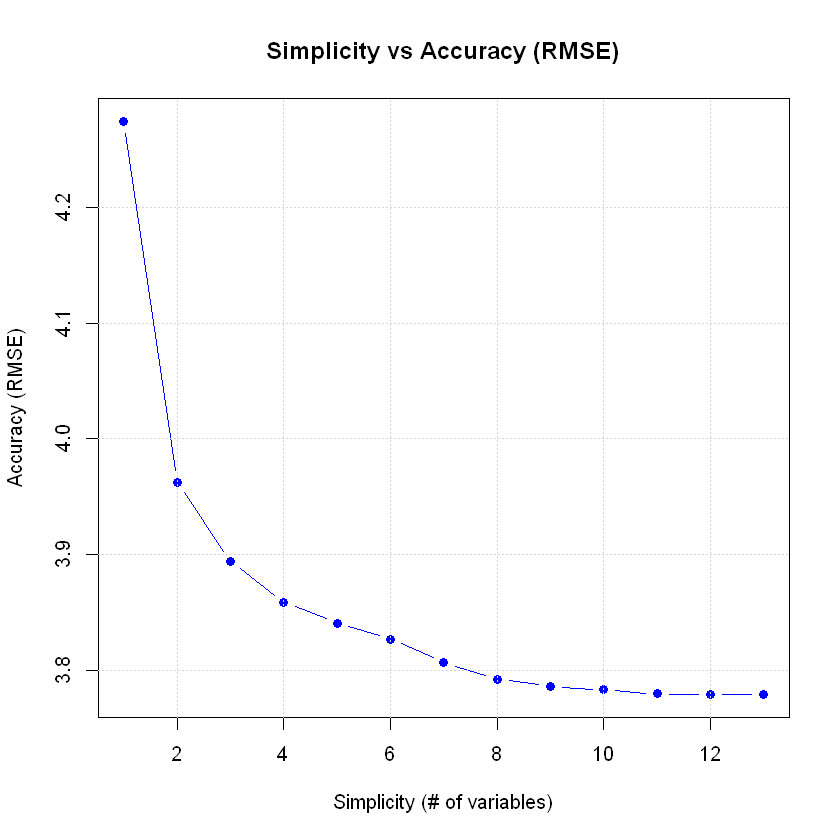

In [60]:
simplicity <- 1:13

plot(simplicity, R_square, type = "b", pch = 19, col = "blue", 
     xlab = "Simplicity (# of variables)", ylab = "Accuracy (R square)", 
     main = "Simplicity vs Accuracy (R square)")

plot(simplicity, rmse, type = "b", pch = 19, col = "blue", 
     xlab = "Simplicity (# of variables)", ylab = "Accuracy (RMSE)", 
     main = "Simplicity vs Accuracy (RMSE)")

grid()

# robust1：compare with existing models   
  

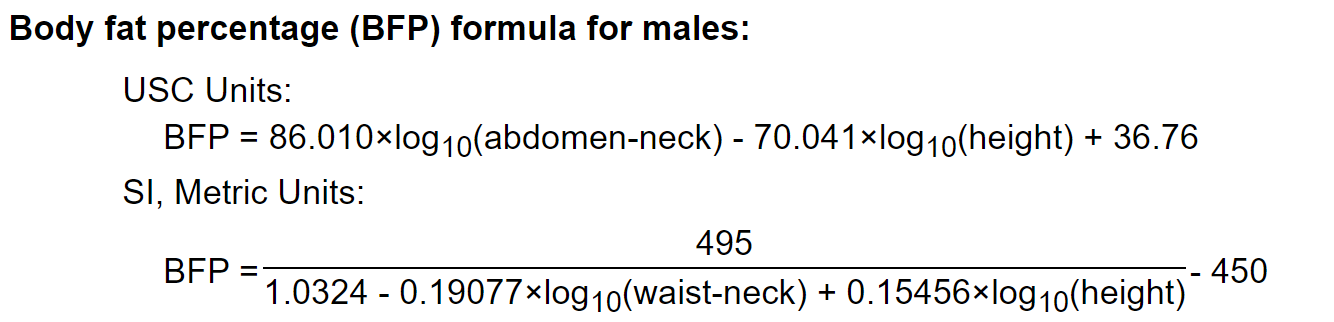

https://www.calculator.net/body-fat-calculator.html?ctype=standard&csex=m&cage=42&cweightlbs=188.75&cheightfeet=0&cheightinch=73.25&cneckfeet=0&cneckinch=37.5&cwaistfeet=0&cwaistinch=91.6&chipfeet=2&chipinch=10.5&cweightkgs=70&cheightmeter=178&cneckmeter=50&cwaistmeter=96&chipmeter=92&x=Calculate

In [61]:
other_model_pred = 86.010*log10(0.3937*cleared_bodyfat$ABDOMEN - 0.3937*cleared_bodyfat$NECK) - 70.041*log10(cleared_bodyfat$HEIGHT) + 36.76
mse_other_model <- mean((other_model_pred-cleared_bodyfat$BODYFAT)^2)

In [62]:
print(mse_other_model)

[1] 21.64543


Based on the above analysis, considering both simplicity and accuracy, we have decided to select the second model from the best subset.

In [63]:
final_vars <- names(coef(best_subset, id = 2))
formula <- as.formula(paste("BODYFAT ~", paste(final_vars[-1], collapse = " + ")))
final_model <- lm(formula, data = cleared_bodyfat)
summary(final_model)


Call:
lm(formula = formula, data = cleared_bodyfat)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1265  -2.9494  -0.1079   2.8238   9.8262 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.54699    2.46423 -16.860  < 2e-16 ***
WEIGHT       -0.12353    0.01956  -6.315 1.27e-09 ***
ABDOMEN       0.89379    0.05236  17.070  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.987 on 244 degrees of freedom
Multiple R-squared:  0.714,	Adjusted R-squared:  0.7116 
F-statistic: 304.5 on 2 and 244 DF,  p-value: < 2.2e-16


In [64]:
# The Shapiro-Wilk test and Q-Q plot can be used to test the normality of the residuals
residuals <- final_model$residuals
shapiro_test <- shapiro.test(residuals)
print(shapiro_test)


	Shapiro-Wilk normality test

data:  residuals
W = 0.99245, p-value = 0.2399



In [65]:
# Use the Durbin-Watson test to check the independence of the residuals.
library(car)
durbinWatsonTest(final_model)

Loading required package: carData



 lag Autocorrelation D-W Statistic p-value
   1       0.0952869      1.806973   0.118
 Alternative hypothesis: rho != 0

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  final_model
BP = 1.4035, df = 2, p-value = 0.4957


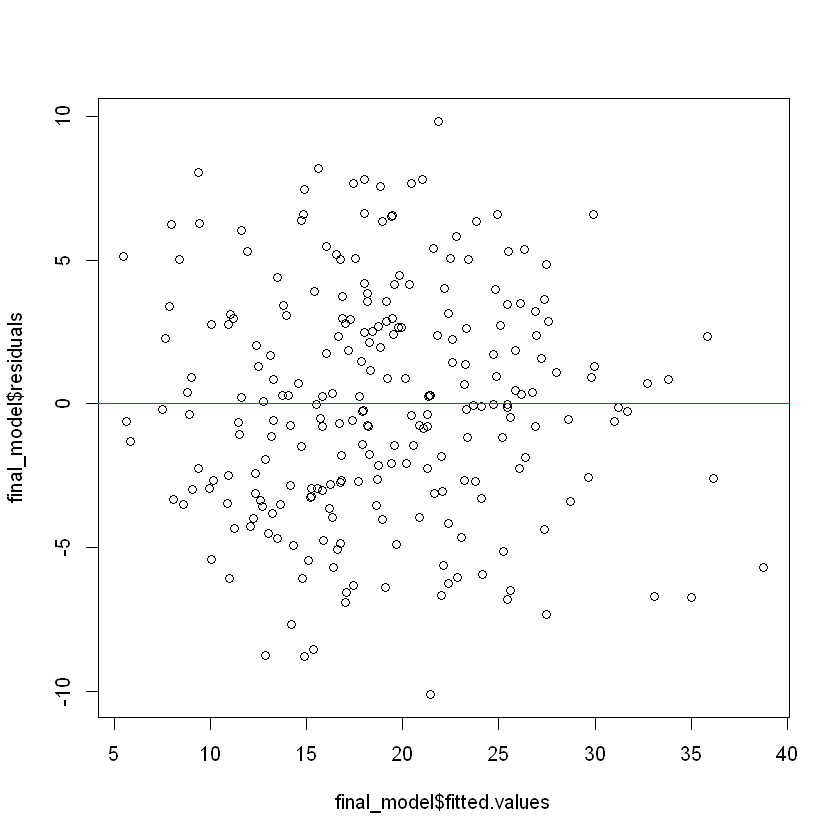

In [66]:
# Homoscedasticity can be checked using a residual plot or by applying the Breusch-Pagan test.
# Residual plot
plot(final_model$fitted.values, final_model$residuals)
abline(h = 0, col = "red")

# Breusch-Pagan test
library(lmtest)
bptest(final_model)


In [67]:
#The Variance Inflation Factor (VIF) can be used to detect multicollinearity.
library(car)
vif(final_model)


WEIGHT  ABDOMEN 
4.271578 4.271578

## CI

In [68]:
prediction_interval <- function(model, new_data, level = 0.95) {
    
  predictions <- predict(model, newdata = new_data, interval = "confidence", level = level)
  return(predictions)
}
prediction_interval(final_model, bodyfat[39,], level = 0.95)

fit      lwr      upr     
39 45.96312 42.44227 49.48398

In [69]:
bodyfat[39,]

BODYFAT AGE WEIGHT HEIGHT NECK CHEST ABDOMEN HIP   THIGH KNEE ANKLE BICEPS
39 33.8    46  363.15 72.25  51.2 136.2 148.1   147.7 87.3  49.1 29.6  45    
   FOREARM WRIST
39 29      21.4

## Percentage of prediction

In [70]:
predictions <- predict(final_model, newdata = cleared_bodyfat)
truth_values <- cleared_bodyfat$BODYFAT
error <- abs(predictions - truth_values)
prop_003 <- mean(error < 1)
prop_005 <- mean(error < 3)
prop_01  <- mean(error < 5)

result <- data.frame(
  Threshold = c("< 1", "< 5", "< 10"),
  Proportion = c(prop_003, prop_005, prop_01)
)

print(result)

  Threshold Proportion
1       < 1  0.2267206
2       < 5  0.5344130
3      < 10  0.7530364


## predicted plot

In [71]:
#install.packages("plotly")
library(plotly)

x <- cleared_bodyfat$WEIGHT
y <- cleared_bodyfat$ABDOMEN
z <- cleared_bodyfat$BODYFAT

intercept <- coef(final_model)[1]
slope_x <- coef(final_model)[2]
slope_y <- coef(final_model)[3]

x_pred <- seq(min(x), max(x), length.out = 300)
y_pred <- seq(min(y), max(y), length.out = 300)
grid <- expand.grid(x = x_pred, y = y_pred)

z_pred <- intercept + slope_x * grid$x + slope_y * grid$y
z_pred[z_pred <= 0] <- NA
predicted_plane <- matrix(z_pred, nrow = length(x_pred), ncol = length(y_pred))


plot_ly() %>%
  add_markers(x = ~x, y = ~y, z = ~z, color = I("blue"), opacity = 0.7,
              marker = list(size = 3)) %>%  
  add_surface(x = ~x_pred, y = ~y_pred, z = ~predicted_plane, colorscale = list(c(0, 1), c("red", "orange")), opacity = 0.5) %>%
  layout(scene = list(xaxis = list(title = "ABDOMEN(cm)"),
                      yaxis = list(title = "WEIGHT(lbs)"),
                      zaxis = list(title = "BODYFAT(%)")),
         title = "3D Scatter Plot with Regression Plane")

Loading required package: ggplot2


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




HTML widgets cannot be represented in plain text (need html)

## heatmap

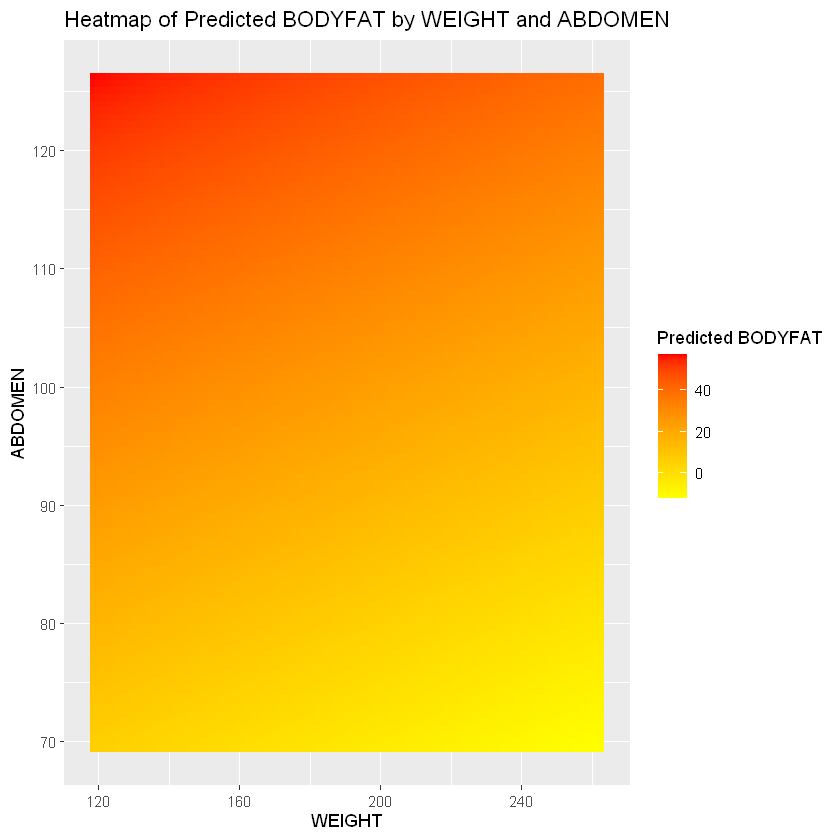

In [72]:
library(ggplot2)

# Assume you already have x, y, and the model final_model
x <- cleared_bodyfat$WEIGHT
y <- cleared_bodyfat$ABDOMEN
z <- cleared_bodyfat$BODYFAT

# Generate a grid for predictions
x_pred <- seq(min(x), max(x), length.out = 100)
y_pred <- seq(min(y), max(y), length.out = 100)
grid <- expand.grid(x = x_pred, y = y_pred)

# Use the model to predict BODYFAT values based on the grid
grid$z_pred <- predict(final_model, newdata = data.frame(WEIGHT = grid$x, ABDOMEN = grid$y))

# Create the heatmap
ggplot(grid, aes(x = x, y = y, fill = z_pred)) +
  geom_tile() +
  scale_fill_gradient(low = "yellow", high = "red") +
  labs(x = "WEIGHT", y = "ABDOMEN", fill = "Predicted BODYFAT") +
  ggtitle("Heatmap of Predicted BODYFAT by WEIGHT and ABDOMEN")

# robustness2: outliers

### using outliers_used_for_test to test the robustness of our final_model

In [73]:
predictions <- predict(final_model, outliers_used_for_test)
print(outliers_used_for_test$BODYFAT)
print(predictions)

[1] 33.8 45.1
      39      216 
45.96312 40.53151 


## Sensitivity

In [74]:
# add noise on X
noisy_bodyfat <- cleared_bodyfat

set.seed(123)

for (col in colnames(noisy_bodyfat)[-1]) { 
  column_mean <- mean(cleared_bodyfat[[col]], na.rm = TRUE)

  noise_sd <- column_mean * 0.02

  noisy_bodyfat[[col]] <- cleared_bodyfat[[col]] + rnorm(nrow(cleared_bodyfat), mean = 0, sd = noise_sd)
}

y_mean <- mean(cleared_bodyfat$BODYFAT, na.rm = TRUE)
y_noise_sd <- y_mean * 0.025
noisy_bodyfat$BODYFAT <- cleared_bodyfat$BODYFAT + rnorm(nrow(cleared_bodyfat), mean = 0, sd = y_noise_sd)


In [75]:
#head(cleared_bodyfat)

In [76]:
#head(noisy_bodyfat)

In [77]:
# fit on noisy_bodyfat and calculate MSE

predictions <- predict(final_model, noisy_bodyfat)
residuals <- cleared_bodyfat$BODYFAT - predictions
noisy_rmse <- sqrt(mean(residuals^2))

In [78]:
print(noisy_rmse)

[1] 4.216411
